In [1]:
import numpy as np
from aggregators import *
import time
import matplotlib.pyplot as plt

# Compare with model size

In [8]:
'''model dimension'''
dim_list = [100, 1000, 10000, 100000, 1000000, 10000000]
diff1, diff2, diff3 = [], [], []

for i in dim_list:
    print(f'model size: {i}')
    '''create data'''
    a = np.random.rand(5,i)
    b = np.random.rand(i,5)
    
    '''exp1: gamma mean'''
    time1 = time.time()
    gam_mean = gamma_mean(a, weights=None, history_points=None, compute='simple', gamma=0.001, max_iter=5, 
                      tol=1e-7, remove=False, beta=0.1, initial='median')
    time_diff1 = time.time()-time1
    diff1.append(round(time_diff1,5))
    
    '''exp2: FedAvg'''
    time2 = time.time()
    meds = mean(a)
    time_diff2 = time.time()-time2
    diff2.append(round(time_diff2,5))
    
    
    '''exp3: marginal median'''
    time3 = time.time()
    meds = median(a)
    time_diff3 = time.time()-time3
    diff3.append(round(time_diff3,5))
    
    
    '''exp3: coordinate wise computation'''
    '''
    time3 = time.time()
    for d in b:
        gam_mean = gamma_mean(np.expand_dims(d, -1), weights=None, history_points=None, compute='simple', gamma=0.001, max_iter=5, 
                          tol=1e-7, remove=False, beta=0.1, initial='median')
    time_diff3 = time.time()-time3
    diff3.append(round(time_diff3,5))
    '''
    

model size: 100
model size: 1000
model size: 10000
model size: 100000
model size: 1000000
model size: 10000000


# Compare with # clients

In [13]:
'''model dimension'''
client_list = [5, 10, 20, 50, 100] 

diff1, diff2, diff3 = [], [], []

for c in client_list:
    print(f'client number: {c}')
    '''create data'''
    a = np.random.rand(c,1000000)
    
    '''exp1: gamma mean'''
    time1 = time.time()
    gam_mean = gamma_mean(a, weights=None, history_points=None, compute='simple', gamma=0.001, max_iter=5, 
                      tol=1e-7, remove=False, beta=0.1, initial='median')
    time_diff1 = time.time()-time1
    diff1.append(round(time_diff1,5))
    
    '''exp2: FedAvg'''
    time2 = time.time()
    meds = mean(a)
    time_diff2 = time.time()-time2
    diff2.append(round(time_diff2,5))
    
    
    '''exp3: marginal median'''
    time3 = time.time()
    meds = median(a)
    time_diff3 = time.time()-time3
    diff3.append(round(time_diff3,5))

client number: 5
client number: 10
client number: 20
client number: 50
client number: 100


## Time Complexity 
#### K: number of clients 
#### d: model dimension
#### g: gamma mean algorithm iterations


marginal median:  O(K) x O(d) = O(Kd)

gamma-mean:       O(Kd) + O(g) x O(K) = O(Kd+gK) = O(K x (d+g))

coord gamma mean: [O(K) + O(g) x O(K)] x O(d) = O(K x (g+1)) x O(d) = O(K x (g+1) x d) = O(K x (d+dg))

In [18]:
print('gamma mean:', diff1)
print('mean:', diff2)
print('marginal median:', diff3)
#print('coord gamma mean:', diff3)

gamma mean: [0.00218, 0.00097, 0.00312, 0.02912, 0.40381, 4.03279]
mean: [0.00012, 2e-05, 3e-05, 0.00027, 0.00477, 0.0555]
marginal median: [0.00013, 0.00023, 0.00124, 0.0127, 0.13622, 1.23038]


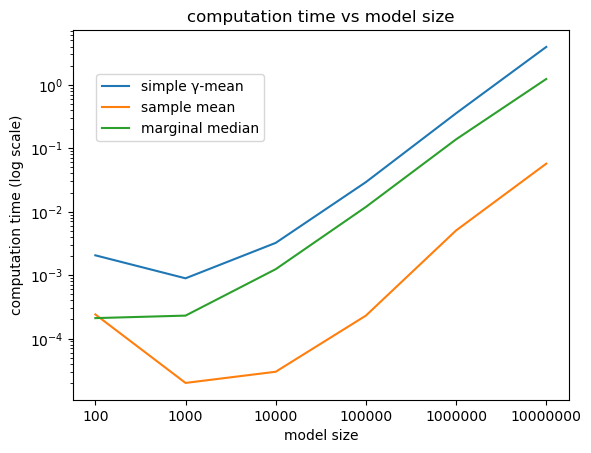

In [12]:
x_range = np.arange(1,7,1)

plt.plot(x_range, diff1, label='simple \u03B3-mean')
plt.plot(x_range, diff2, label='sample mean')
plt.plot(x_range, diff3, label='marginal median')

plt.xlabel('model size')
plt.xticks(np.arange(1,7,1), dim_list)
plt.ylabel('computation time (log scale)')
plt.yscale('log')
plt.title('computation time vs model size')
plt.legend(bbox_to_anchor=(0.4,0.9), fontsize=10)
plt.show()

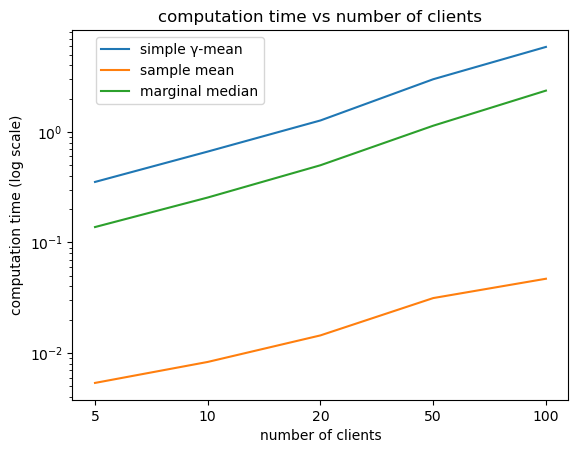

In [16]:
x_range = np.arange(1,6,1)

plt.plot(x_range, diff1, label='simple \u03B3-mean')
plt.plot(x_range, diff2, label='sample mean')
plt.plot(x_range, diff3, label='marginal median')

plt.xlabel('number of clients')
plt.xticks(np.arange(1,6,1), client_list)
plt.ylabel('computation time (log scale)')
plt.yscale('log')
plt.title('computation time vs number of clients')
plt.legend(bbox_to_anchor=(0.4,1), fontsize=10)
plt.show()